In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.style.use(['dark_background'])

# Importing the Video

## Convert it to wav
The WAV audio format was developed by Microsoft and has become one of the primary formats of uncompressed audio. It stores audio at about 10 MB per minute at a 44.1 kHz sample rate using stereo 16-bit samples. The WAV format is by definition, the highest quality 16-bit audio format. It is also the largest at about 10 MB per minute of CD quality audio. The quality can be sacrificed for file size by adjusting the sampling rate, data width (i.e. 8-bits), and number of channels (up to 2 for stereo).

https://www.isip.piconepress.com/projects/speech/software/tutorials/production/fundamentals/v1.0/section_02/s02_01_p05.html#:~:text=The%20WAV%20format%20is%20by,up%20to%202%20for%20stereo).

In [2]:
# !mpg123 -w solo_dolo.wav solo_dolo.mp3

In [3]:
!ls

solo_dolo.mp3  solo_dolo.wav  Untitled.ipynb


### Import data and sampling frequency

In [61]:
from scipy.io import wavfile
import numpy as np

fs, audio = wavfile.read('solo_dolo.wav')
t = np.linspace(0, audio.shape[0] / fs, num=audio.shape[0])

print("Total seconds:",t[-1])
print('sample rate [Hz]:', fs)
print('data shape',audio.shape)

Total seconds: 266.370612244898
sample rate [Hz]: 44100
data shape (11746944, 2)


The total seconds can be verified by seeing that media player thinks this thing is 4 min 27 sec.

In [51]:
minutes = 4 + 27/60
seconds = minutes * 60
n_points = seconds * fs
minutes, seconds, n_points

(4.45, 267.0, 11774700.0)

# EDA on raw Wav files

## 2 Channels?
What are these two channels? Left and right? Are they the same

### full dataset


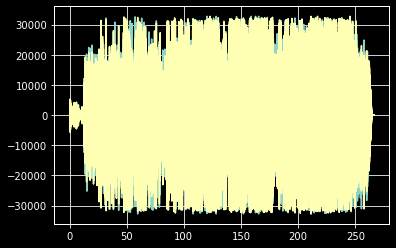

In [56]:
plt.plot(t, audio[:,0])
plt.plot(t, audio[:,1])
# plt.legend(['chan1','chan2'])

### beginning
They are basically the same

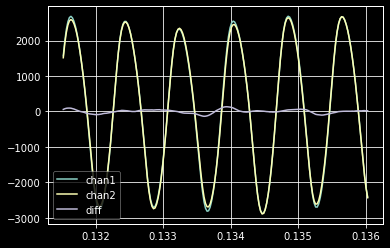

In [57]:
idx_len = 200
start_idx = 5800
end_idx = start_idx + idx_len

time, data = t[start_idx:end_idx], audio[start_idx:end_idx]
diffs = data[:,0] - data[:,1]

plt.plot(time, data[:,0])
plt.plot(time, data[:,1])
plt.plot(time, diffs)

plt.legend(['chan1','chan2','diff'])

### 2 seconds in
Already see a deviation between the two channels. I can go listen to the the media track to see what is going on

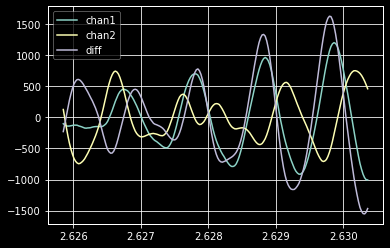

In [58]:
idx_len = 200
start_idx = 115800
end_idx = start_idx + idx_len

time, data = t[start_idx:end_idx], audio[start_idx:end_idx]
diffs = data[:,0] - data[:,1]

plt.plot(time, data[:,0])
plt.plot(time, data[:,1])
plt.plot(time, diffs)

plt.legend(['chan1','chan2','diff'])

## What is the y axis?

# FFT

Might want to try and use LMMS to make a piano track of the C scale for example